# KNN IRIS 다중분류(multi classification)

---

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier

In [9]:
def get_iris(mode = None):
    df = pd.read_csv('iris.csv')
    df = df.drop(["Id"], axis=1).copy()
    df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']
    
    
    if(mode == 'bin'):
        df = df.loc[df['species'] != 'Iris-virginica']
        
    df['species'] = df['species'].map({
    'Iris-setosa':0,
    'Iris-versicolor':1, 
    'Iris-virginica':2
    }) 
    df = df.loc[df['species'] < 2, :]
    
    X = df.iloc[:, :4]
    y = df.iloc[:,-1]
    
    X, y = shuffle(X,y, random_state=2022)
    num = int(len(y)*0.8)
    X_train = X.iloc[:num,:]
    X_test = X.iloc[num:,:]
    y_train = y.iloc[:num]
    y_test = y.iloc[num:]
    
    for col in X.columns:
        mu = X_train[col].mean()
        std = X_train[col].std()
        X_train[col] = (X_train[col]-mu)/std
        X_test[col] = (X_test[col]-mu)/std
    
    return X_train, X_test, y_train, y_test


In [10]:
X_train, X_test, y_train, y_test = get_iris()


print(X_train.shape,X_test.shape)
print(y_train.shape, y_test.shape)

(80, 4) (20, 4)
(80,) (20,)


C:\Users\023\AppData\Local\Temp\ipykernel_8592\3362913873.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = (X_train[col]-mu)/std
C:\Users\023\AppData\Local\Temp\ipykernel_8592\3362913873.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = (X_test[col]-mu)/std


In [13]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [22]:
from sklearn.neighbors import KNeighborsClassifier
scores = []
for i in range(3, 30):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    score = clf.score(X_train, y_train)
    scores.append(score)
scores

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [18]:
y_pred = clf.predict(X_test)
y_pred, y_test

(array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1],
       dtype=int64),
 array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1],
       dtype=int64))

In [19]:
(y_pred == y_test).sum()/len(y_test)

1.0

In [20]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)
cfm 

array([[13,  0],
       [ 0,  7]], dtype=int64)

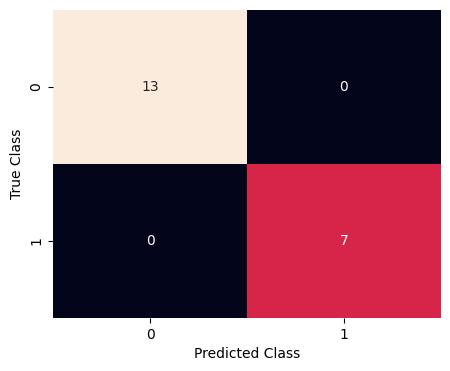

In [23]:
plt.figure(figsize=(5,4))
sns.heatmap(cfm, annot =True, cbar = False)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()